<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is a method that constructs a single polynomial, known as the Lagrange polynomial $L(x)$, which passes through all the data points in a given dataset. Unlike methods that interpolate between pairs of points using cubic polynomials, Lagrange interpolation seeks to find one polynomial that fits all points.

The Lagrange Polynomial should have the property $L(x_i) = y_i$
It is useful to write the polynomials as a linear combination of Lagrange Basis Polynomials $P_i(x)$:$P_i(x) = ((Π)^n,_j=1,_j\neq_1) = (x-x_j)/(x_i-x_j)$
 \\
$L(x) = ((Σ)^n, i=1)* y_i *P_i(x)$
 \\
$P_i(x)$ has the property $P_i(x_j)=1$ when $i=j$ and $P_i(x_j) = 0$ when $i \neq j$
Since $L(x)$ is a sum of these polynomials, $L(x_i) = y_i$

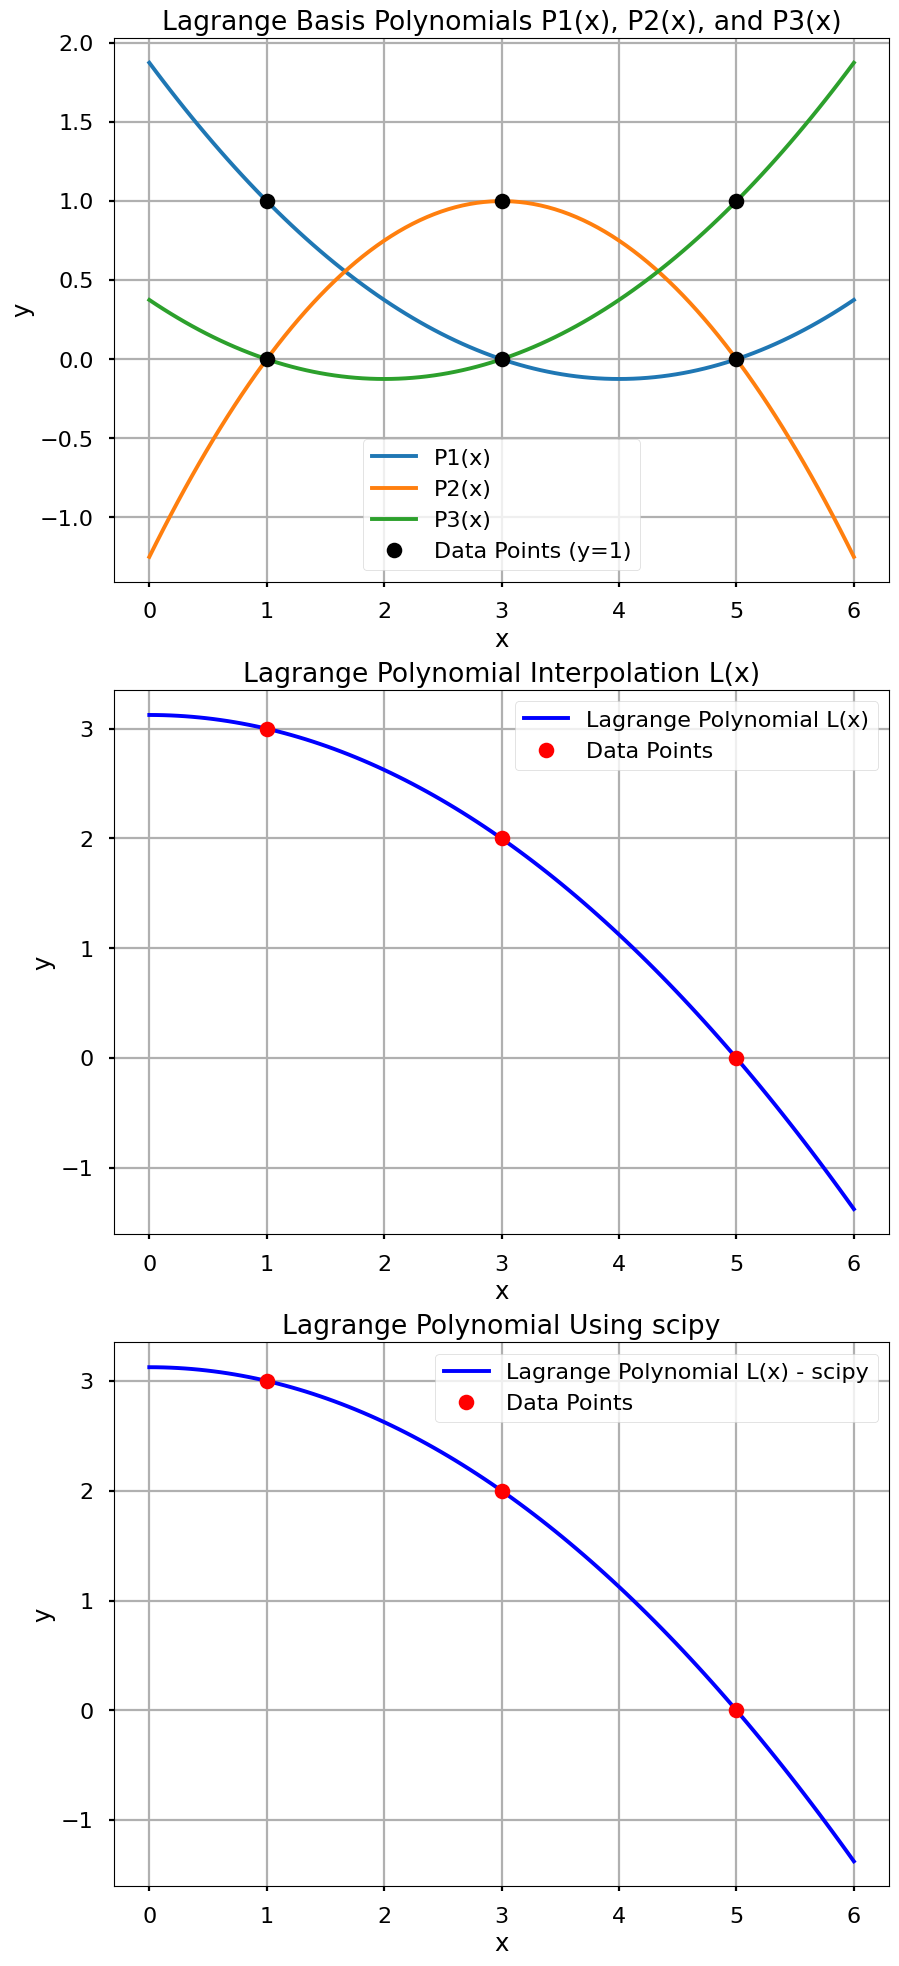

In [ ]:
# Complete code to demonstrate Lagrange Polynomial Interpolation with scipy and basis polynomials

import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# data points
x_updated = [1, 3, 5]
y_updated = [3, 2, 0]

# Creating a range for plotting
x_range = np.linspace(0, 6, 100)

# Plotting the Lagrange basis polynomials and the Lagrange polynomial using scipy
fig, axs = plt.subplots(3, 1, figsize=(10, 24))

# Calculating and plotting each Lagrange basis polynomial
for i in range(len(x_updated)):
    # Creating a basis polynomial
    basis_poly_coeff = [1 if j == i else 0 for j in range(len(x_updated))]
    L_basis = lagrange(x_updated, basis_poly_coeff)
    axs[0].plot(x_range, L_basis(x_range), label=f'P{i+1}(x)')

# Adding data points for basis polynomials
axs[0].plot(x_updated, np.ones(len(x_updated)), 'ko', label='Data Points (y=1)')
axs[0].plot(x_updated, [0]*(len(x_updated)), 'ko')

axs[0].set_title('Lagrange Basis Polynomials P1(x), P2(x), and P3(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)
axs[0].legend()

# Computing and plotting the Lagrange interpolation polynomial
L_poly = lagrange(x_updated, y_updated)
axs[1].plot(x_range, L_poly(x_range), 'b', label='Lagrange Polynomial L(x)')
axs[1].plot(x_updated, y_updated, 'ro', label='Data Points')

axs[1].set_title('Lagrange Polynomial Interpolation L(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid(True)
axs[1].legend()

# Using lagrange function from scipy
f_lagrange = lagrange(x_updated, y_updated)

# Plotting the Lagrange polynomial using scipy's lagrange function
axs[2].plot(x_range, f_lagrange(x_range), 'b', label='Lagrange Polynomial L(x) - scipy')
axs[2].plot(x_updated, y_updated, 'ro', label='Data Points')

axs[2].set_title('Lagrange Polynomial Using scipy')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].grid(True)
axs[2].legend()

plt.show()


## Newton's Polynomial Interpolation

One other technique for precisely fitting a set of data points is Newton's Polynomial Interpolation.
\\
General form of a a n-1 order Newton's Polynomial that goes through n points is:

$f(x) = a0 + a1* (x-x_0) + a2* (x-x_0)(x-x_1) + ... + an (x-x_0)* (x-x_1)* ...* (x-x_n)$


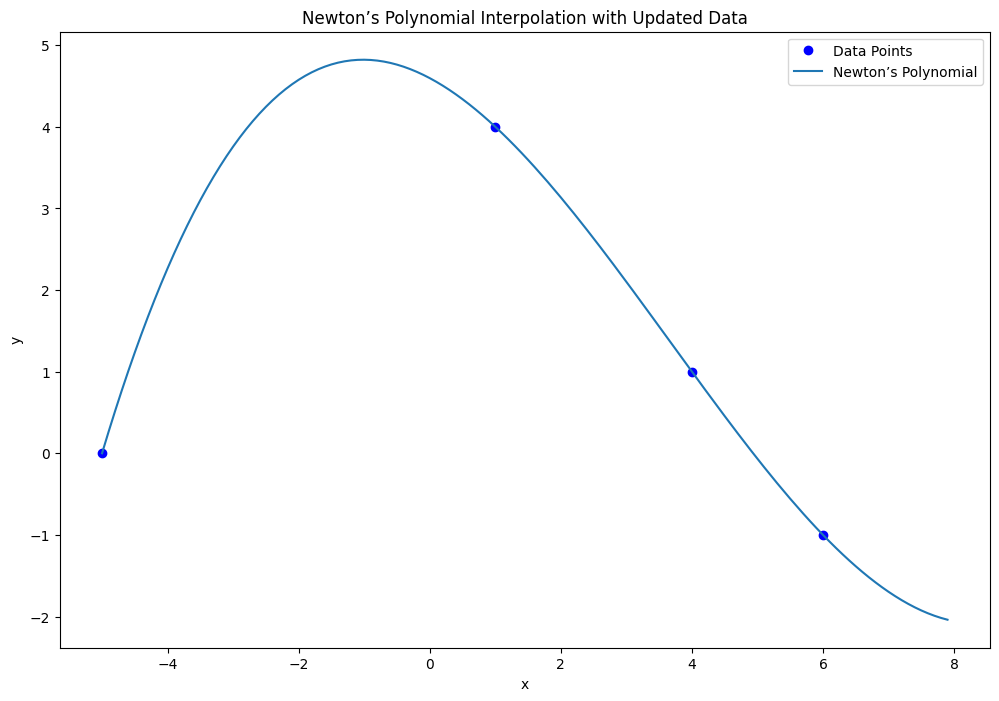

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the divided differences table
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y  # the first column is y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef

# Function to evaluate the Newton polynomial at x
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

# Updated data points
x_updated = np.array([-5, 1, 4, 6])
y_updated = np.array([0, 4, 1, -1])

# Get the divided difference coefficients
a_s_updated = divided_diff(x_updated, y_updated)[0, :]

# Evaluate on new data points
x_new_updated = np.arange(-5, 8, 0.1)
y_new_updated = newton_poly(a_s_updated, x_updated, x_new_updated)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_updated, y_updated, 'bo', label='Data Points')
plt.plot(x_new_updated, y_new_updated, label='Newton’s Polynomial')
plt.title("Newton’s Polynomial Interpolation with Updated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
